In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)


Mounted at /content/drive/


In [ ]:
% cd drive/MyDrive/MELD/

/content/drive/MyDrive/MELD


## LOAD DEPENDENCIES

In [ ]:
import nltk
stopwords = nltk.download('stopwords')
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn import preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## LOAD DATA

In [ ]:
train_set = pd.read_csv('train_sent_emo.csv')
valid_set = pd.read_csv('dev_sent_emo.csv')
test_set = pd.read_csv('test_sent_emo.csv')

## EXPLORATORY DATA ANALYSIS

In [ ]:
train_set.shape, valid_set.shape , test_set.shape

((9989, 11), (1109, 11), (2610, 11))

In [ ]:
train_set.columns

Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'],
      dtype='object')

In [ ]:
valid_set.columns#cross validation

Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'],
      dtype='object')

In [ ]:
test_set.columns

Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'],
      dtype='object')

In [ ]:
train_set.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


neutral     4710
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: Emotion, dtype: int64


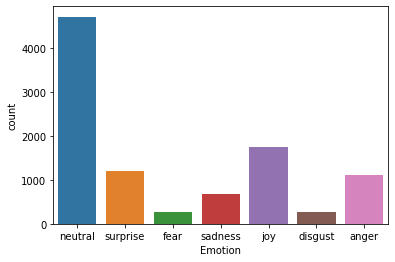

In [ ]:
#Imbalanced Data
ax = sns.countplot(x=train_set['Emotion'], data=train_set)
print(train_set['Emotion'].value_counts())

neutral     470
joy         163
anger       153
surprise    150
sadness     111
fear         40
disgust      22
Name: Emotion, dtype: int64


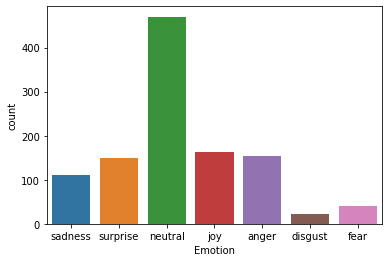

In [ ]:
#Imbalanced Data
ax = sns.countplot(x=valid_set['Emotion'], data=valid_set)
print(valid_set['Emotion'].value_counts())

neutral     1256
joy          402
anger        345
surprise     281
sadness      208
disgust       68
fear          50
Name: Emotion, dtype: int64


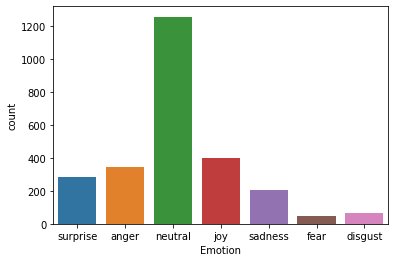

In [ ]:
#Imbalanced Data
ax = sns.countplot(x=test_set['Emotion'], data=test_set)
print(test_set['Emotion'].value_counts())

### Observation : 
1. Neutral emotion is dominating in CV ,Test set and  Train set


In [ ]:
train_set.info() #No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


In [ ]:
valid_set.info()  #No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        1109 non-null   int64 
 1   Utterance     1109 non-null   object
 2   Speaker       1109 non-null   object
 3   Emotion       1109 non-null   object
 4   Sentiment     1109 non-null   object
 5   Dialogue_ID   1109 non-null   int64 
 6   Utterance_ID  1109 non-null   int64 
 7   Season        1109 non-null   int64 
 8   Episode       1109 non-null   int64 
 9   StartTime     1109 non-null   object
 10  EndTime       1109 non-null   object
dtypes: int64(5), object(6)
memory usage: 95.4+ KB


In [ ]:
test_set.info()  #No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        2610 non-null   int64 
 1   Utterance     2610 non-null   object
 2   Speaker       2610 non-null   object
 3   Emotion       2610 non-null   object
 4   Sentiment     2610 non-null   object
 5   Dialogue_ID   2610 non-null   int64 
 6   Utterance_ID  2610 non-null   int64 
 7   Season        2610 non-null   int64 
 8   Episode       2610 non-null   int64 
 9   StartTime     2610 non-null   object
 10  EndTime       2610 non-null   object
dtypes: int64(5), object(6)
memory usage: 224.4+ KB


## Splits

In [ ]:
X_train , y_train = train_set[['Utterance']] , train_set[['Emotion']]
X_valid , y_valid = valid_set[['Utterance']] , valid_set[['Emotion']]
X_test , y_test = test_set[['Utterance']] , test_set[['Emotion']]

## Using LabelEncoder to vectorise labels

In [ ]:
lbl_enc = preprocessing.LabelEncoder()
y_train_enc = lbl_enc.fit_transform(y_train.Emotion.values)
y_valid_enc = lbl_enc.transform(y_valid.Emotion.values)
y_test_enc = lbl_enc.transform(y_test.Emotion.values)

In [ ]:
y_train.Emotion.values[1:200]

array(['neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'fear', 'neutral', 'surprise',
       'neutral', 'surprise', 'sadness', 'surprise', 'fear', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'joy', 'sadness',
       'surprise', 'neutral', 'disgust', 'sadness', 'neutral', 'neutral',
       'joy', 'neutral', 'joy', 'surprise', 'surprise', 'surprise',
       'neutral', 'neutral', 'neutral', 'surprise', 'sadness', 'neutral',
       'surprise', 'joy', 'surprise', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'joy', 'joy', 'joy', 'sadness', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'surprise',
       'joy', 'surprise', 'joy', 'neutral', 'neutral', 'anger', 'joy',
       'neutral', 'surprise', 'anger', 'anger', 'anger', 'neutral',
       'neutral', 'sadness', 'sadness', 'sadness', 'surprise', 'anger',
       'anger', 'anger', 'anger', 'neutral', 'anger', 'neutral',
     

In [ ]:
y_train_enc[1:200]

array([4, 4, 4, 6, 4, 4, 4, 4, 4, 2, 4, 6, 4, 6, 5, 6, 2, 4, 4, 4, 4, 4,
       3, 5, 6, 4, 1, 5, 4, 4, 3, 4, 3, 6, 6, 6, 4, 4, 4, 6, 5, 4, 6, 3,
       6, 4, 4, 4, 4, 4, 3, 3, 3, 5, 4, 4, 4, 4, 4, 4, 6, 3, 6, 3, 4, 4,
       0, 3, 4, 6, 0, 0, 0, 4, 4, 5, 5, 5, 6, 0, 0, 0, 0, 4, 0, 4, 4, 4,
       4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 1, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 1, 6, 1, 4, 2, 4, 6, 2,
       1, 0, 3, 4, 6, 4, 4, 4, 4, 6, 4, 4, 0, 4, 4, 5, 6, 5, 0, 5, 4, 5,
       4, 4, 4, 4, 4, 3, 0, 0, 0, 4, 0, 3, 3, 3, 3, 1, 6, 4, 4, 0, 3, 4,
       4, 2, 4, 2, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 2, 4, 5, 6, 2, 4, 4, 4,
       3])

## Data Preprocesing
Here, we find the word stem of each word in an occurence and concatenate them to find new corpus. This is done for all test, validation and training dataset.


In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
import re

### Dataset Preprocessing training set

train_corpus = []
for i in range(0, len(X_train)):
    review = re.sub('[^a-zA-Z]', ' ', X_train['Utterance'][i])
    review = review.lower()
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    train_corpus.append(review)

In [ ]:
import re

### Dataset Preprocessing cv set
valid_corpus = []
for i in range(0, len(X_valid)):
    review = re.sub('[^a-zA-Z]', ' ', X_valid['Utterance'][i])
    review = review.lower()
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    valid_corpus.append(review)

In [ ]:
import re

### Dataset Preprocessing test set
test_corpus = []
for i in range(0, len(X_test)):
    review = re.sub('[^a-zA-Z]', ' ', X_test['Utterance'][i])
    review = review.lower()
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    test_corpus.append(review)

In [ ]:
print("Before Cleaning Data")
print(X_train['Utterance'] [0])
print("After Cleaning Data")
print(train_corpus[0])


Before Cleaning Data
also I was the point person on my companys transition from the KL-5 to GR-6 system.
After Cleaning Data
also point person compani transit kl gr system


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train['clean_utterance'] = train_corpus
X_train.drop('Utterance',axis=1,inplace=True)


In [ ]:
X_valid['clean_utterance'] = valid_corpus
X_valid.drop('Utterance',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_test.loc[:,'clean_utterance'] = test_corpus
X_test.drop('Utterance',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Vectorization of text
Here, we vectorize the text. This is required so that data can be used to train.

**TF-IDF**  : This is one of methods used to transform text to vector. It uses 2 concepts Term Frequency(TF) which number of occurences of specific term in document. Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term’s occurrences are scattered throughout all the documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tf_idf = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tf_idf.fit(list(X_train['clean_utterance']) + list(X_valid['clean_utterance']) + list(X_test['clean_utterance']))
X_train_tf_idf =  tf_idf.transform(X_train['clean_utterance']) 
X_valid_tf_idf = tf_idf.transform(X_valid['clean_utterance'])
X_test_tf_idf = tf_idf.transform(X_test['clean_utterance'])

**BOW** : Bag-of-words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
bow.fit(list(X_train['clean_utterance']) + list(X_valid['clean_utterance']) + list(X_test['clean_utterance']))
X_train_bow =  bow.transform(X_train['clean_utterance']) 
X_valid_bow = bow.transform(X_valid['clean_utterance'])
X_test_bow = bow.transform(X_test['clean_utterance'])